## Table of Contents
<ul>
<li><a href="#sample_image">sample_image</a></li>
<li><a href="#explor_images_hist">explor_images_hist</a></li>
<li><a href="#exploration_summary">exploration_summary</a></li> 
<li><a href="#apply_CLUHE_filter">apply_CLUHE_filter</a></li>
<li><a href="#applt_canny_edge_detection">applt_canny_edge_detection</a></li>
<li><a href="#apply_LUT_CLAHE">apply_LUT_CLAHE</a></li>
<li><a href="#summary">summary</a></li>
<li><a href="#GausianBlur">GausianBlur</a></li>
<li><a href="#pre-processing_steps">pre-processing_steps</a></li>
<li><a href="#loading_dataset">loading_dataset</a></li>
        - train dataset <br>
        - val dataset <br>
<li><a href="#finding_dameged_images">finding_dameged_images</a></li>
<li><a href="#plt_sample_dameged_images">plt_sample_dameged_images</a></li>
<li><a href="#save_dameged_images">save_dameged_images</a></li>
<li><a href="#explore_dameged_images">explore_dameged_images</a></li>
<li><a href="#fixing_blake_border_of_images">fixing_blake_border_of_images</a></li>
<li><a href="#Gaussian_on_cleaned_images">Gaussian_on_cleaned_images</a></li>
<li><a href="#pre-processing_function">Gaussian_on_cleaned_images</a></li>
<li><a href="#Gaussian_on_cleaned_images">pre-processing_function</a></li>
<li><a href="#apply_pre-processing_function_on_all_data">apply_pre-processing_function_on_all_data</a></li>
        - train dataset <br>
        - val dataset <br>
<li><a href="#save_cleaned_data">save_cleaned_data</a></li>
<li><a href="#load_cleaned_data">load_cleaned_data</a></li>
<li><a href="#modeling">modeling</a></li>
<li><a href="#VGG">VGG</a></li>
- impelement model with pretrained weights <br>
- Freeze layers <br>
- add layers <br>
- compile model  <br>
- fit model <br>
- plot train and val accuracy <br>
<li><a href="#ResNet50">ResNet50</a></li>
- impelement model with pretrained weights <br>
- Freeze layers <br>
- add layers <br>
- compile model  <br>
- fit model <br>
- plot train and val accuracy <br>
<li><a href="#Inception_V3">Inception_V3</a></li>
- load pretrained model from tf.sklearn.application <br>
- Freeze layers <br>
- add layers <br>
- compile model  <br>
- fit model <br>
- plot train and val accuracy <br>
<li><a href="#VIT">VIT</a></li>
- load pretrained VIT model from vit_keras <br>
- Freeze layers <br>
- add layers <br>
- compile model  <br>
- fit model <br>
- plot train and val accuracy <br>


</ul>
                

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D,AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from keras.utils.data_utils import get_file
plt.rcParams["figure.figsize"] = (20,15)
import os

<a id='sample_image'></a>
> first let's take a sample from the data to examin it

In [ ]:
img1 = cv2.imread( 'D:/Bi electric scolership/computer vision/COVID-19_Radiography_Dataset/Normal/images/Normal-1.png' )

In [ ]:
img1.shape

(299, 299, 3)

> so we have a `gray` image with 3 channels 

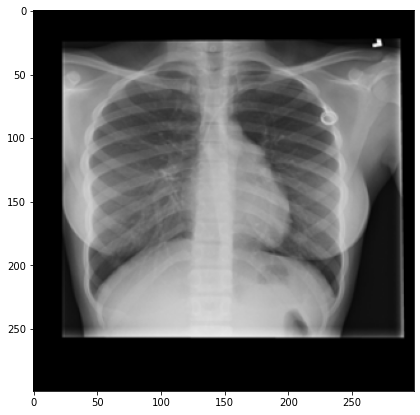

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(img1)
# because it 3D we did not need cmap as it will be RGB , but because all the values are from 0 to 1 then even with 3D the image is still gray

> When img1 has shape (M,N,3) or (M,N,4), the values in img1 are interpreted as RGB or RGBA values. In this case the cmap is ignored. Per the help(plt.imshow) docstring:

cmap : ~matplotlib.colors.Colormap, optional, default: None

If None, default to rc image.cmap value. cmap is ignored when X has RGB(A) information

However, if img were an array of shape (M,N), then the cmap controls the colormap used to display the values.

> let's show all the channels 

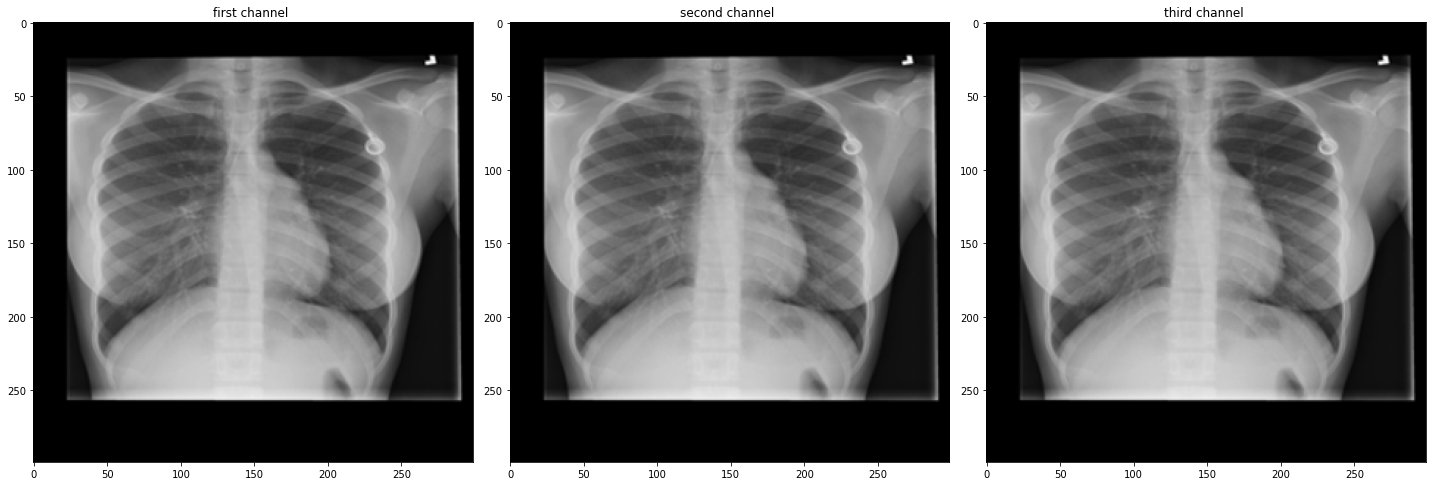

In [ ]:
plt.subplot(1,3,1)
plt.imshow(img1[:,:,0] , cmap='gray')
plt.title('first channel ')

plt.subplot(1,3,2)
plt.imshow(img1[:,:,1] , cmap='gray')
plt.title('second channel ')

plt.subplot(1,3,3)
plt.imshow(img1[:,:,2] , cmap='gray')
plt.title('third channel ')
plt.tight_layout()

> so all the channels are the same 
- i will use just one so we use less memory

> what i want to do is to detect if any photo is corrapted 
- one way to do that is to use histgram

In [ ]:
img1[:,:,2].flatten().shape

(89401,)

Text(50, 0.016, 'because of the blake frame of the image')

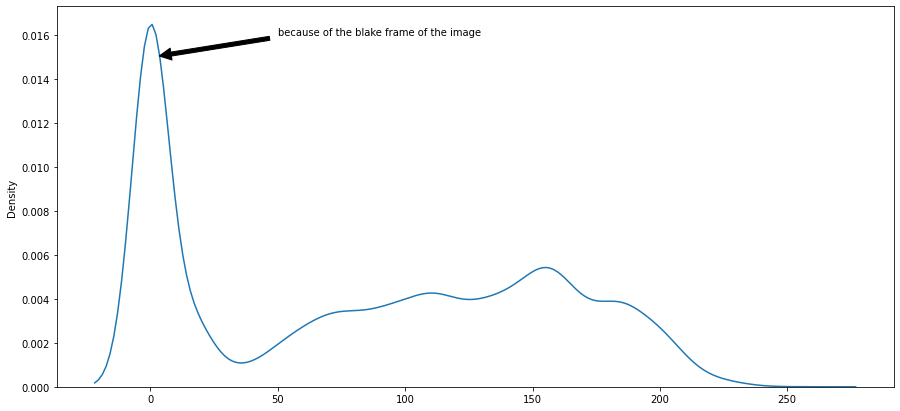

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(img1[:,:,2].flatten())
plt.annotate('because of the blake frame of the image', xy=(1, 0.015), xytext=(50, 0.016),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

> let's see another image with no black frame and see it's dist

In [ ]:
normal_path  = 'D:/Bi electric scolership/computer vision/COVID-19_Radiography_Dataset/Normal/images/'
len(os.listdir(normal_path))

10192

<a id='explor_images_hist'></a>
> let's see 5 different images with there dist

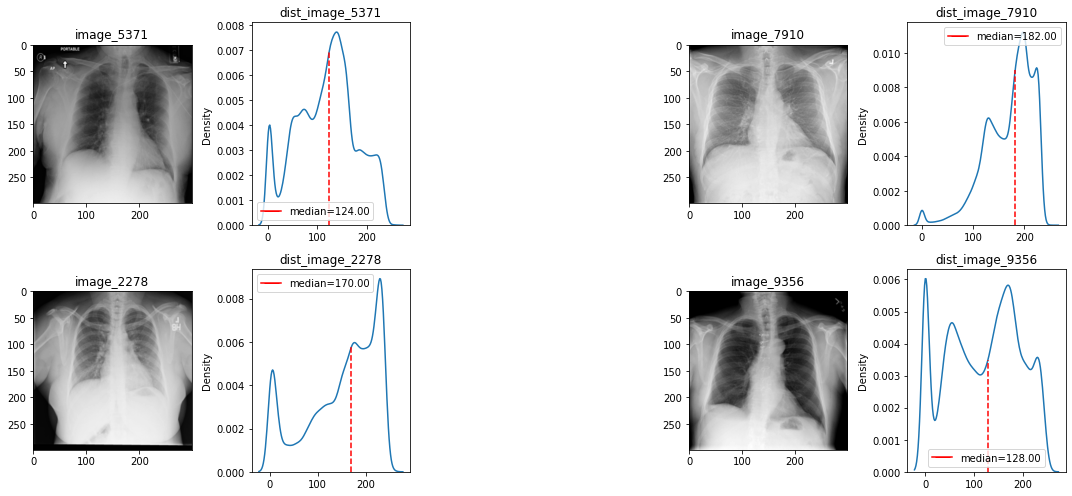

In [ ]:
plt.figure(figsize=(15,7))
np.random.seed = 42
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image = img1 = cv2.imread(img_path)
    
    
    ax = plt.subplot(2,5,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1

    ax = plt.subplot(2,5,i)
    sns.kdeplot(image[:,:,2].flatten() )
    plt.title(f'dist_image_{index}')
    median = np.median(image[:,:,2].flatten())
    #plt.axvline(median,label='median',color='r',ymax = 0.7) ## i can not just use it becuase i want to adjust the median line
    
    data_x, data_y = ax.lines[0].get_data() 
    yi = np.interp(median,data_x, data_y) # get y-value of each median
    plt.vlines(median, 0, ymax = yi, color='red', ls='--' ) # vlines => vertical line
    

    handles =  mlines.Line2D([], [], color='r', marker='_', markersize=15) 
    plt.legend([handles], [f'median={median:.2f}'])

    i+=1
    if (i==3 or i==8):
        i+=1
    plt.tight_layout()

> we get from histgram that is the image is so blur means there are high range of white then it's median will closs to 200 , but the rest of the images which are quit good and show the lungs has a median between `100 and 130` 
- so we can use that to filter the dameged images and get only the clear ones
> another way to do that is with `Sobel/Scharr` operator edge detection followed by a `shallow CNN` to classify the dataset images as `clear or as lacking`

<a id='exploration_summary'></a>
### summary
> so we can see that 
- 1 : the images has a) low brightness; b) noisiness and blurriness 
- 2 : we should try crop or zoom so we can get only the area we want so we do not confuse that model
- 3 : In X-ray images, the bones and lung tissues have a smooth bor- der, making it difficult to classify. To overcome this problem, we `CLAHE` filter to improve images
- we should use edge detection 

<a id='apply_CLUHE_filter'></a>
> now let's see the results of using `CLAHE` filter in the above images

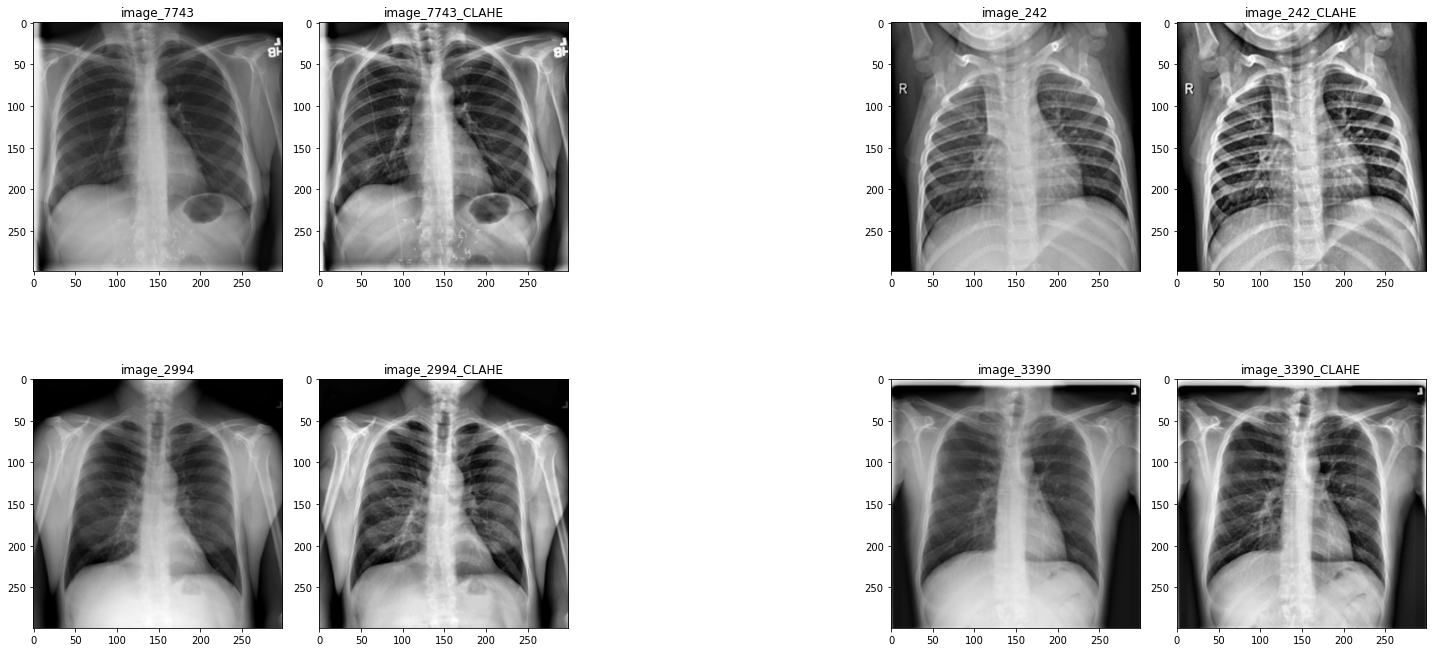

In [ ]:
np.random.seed = 42
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image = img1 = cv2.imread(img_path)
    
    
    ax = plt.subplot(3,5,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    ax = plt.subplot(3,5,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(image[:,:,0] )
    plt.title(f'image_{index}_CLAHE')
    plt.imshow(final_img , cmap='gray')
    i+=1
    if (i==3 or i==8):
        i+=1
    plt.tight_layout()

<a id='applt_canny_edge_detection'></a>
> let's also see appling `canny edge detection`

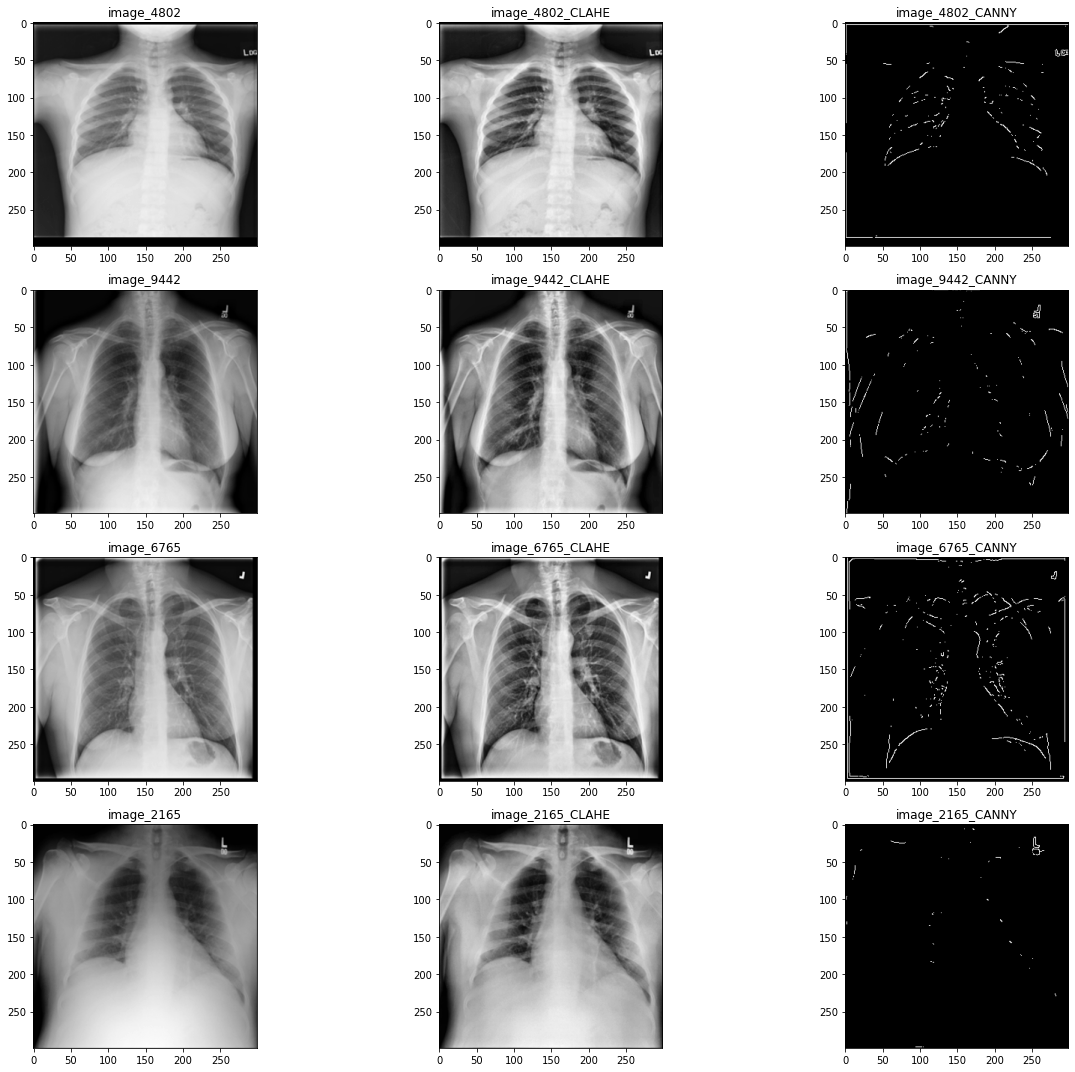

In [ ]:
np.random.seed = 42
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image = img1 = cv2.imread(img_path)
    
    
    ax = plt.subplot(4,3,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    ax = plt.subplot(4,3,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(image[:,:,0] )
    plt.title(f'image_{index}_CLAHE')
    plt.imshow(final_img , cmap='gray')
    i+=1
    
    ax = plt.subplot(4,3,i)
    m,n = final_img.shape
    edges = cv2.Canny(final_img,m,n)
    plt.title(f'image_{index}_CANNY')
    plt.imshow(edges , cmap='gray')
    i+=1
    
    plt.tight_layout()

<a id='apply_LUT_CLAHE'></a>
> let's try different way while i use `LUT` before `CLAHE`

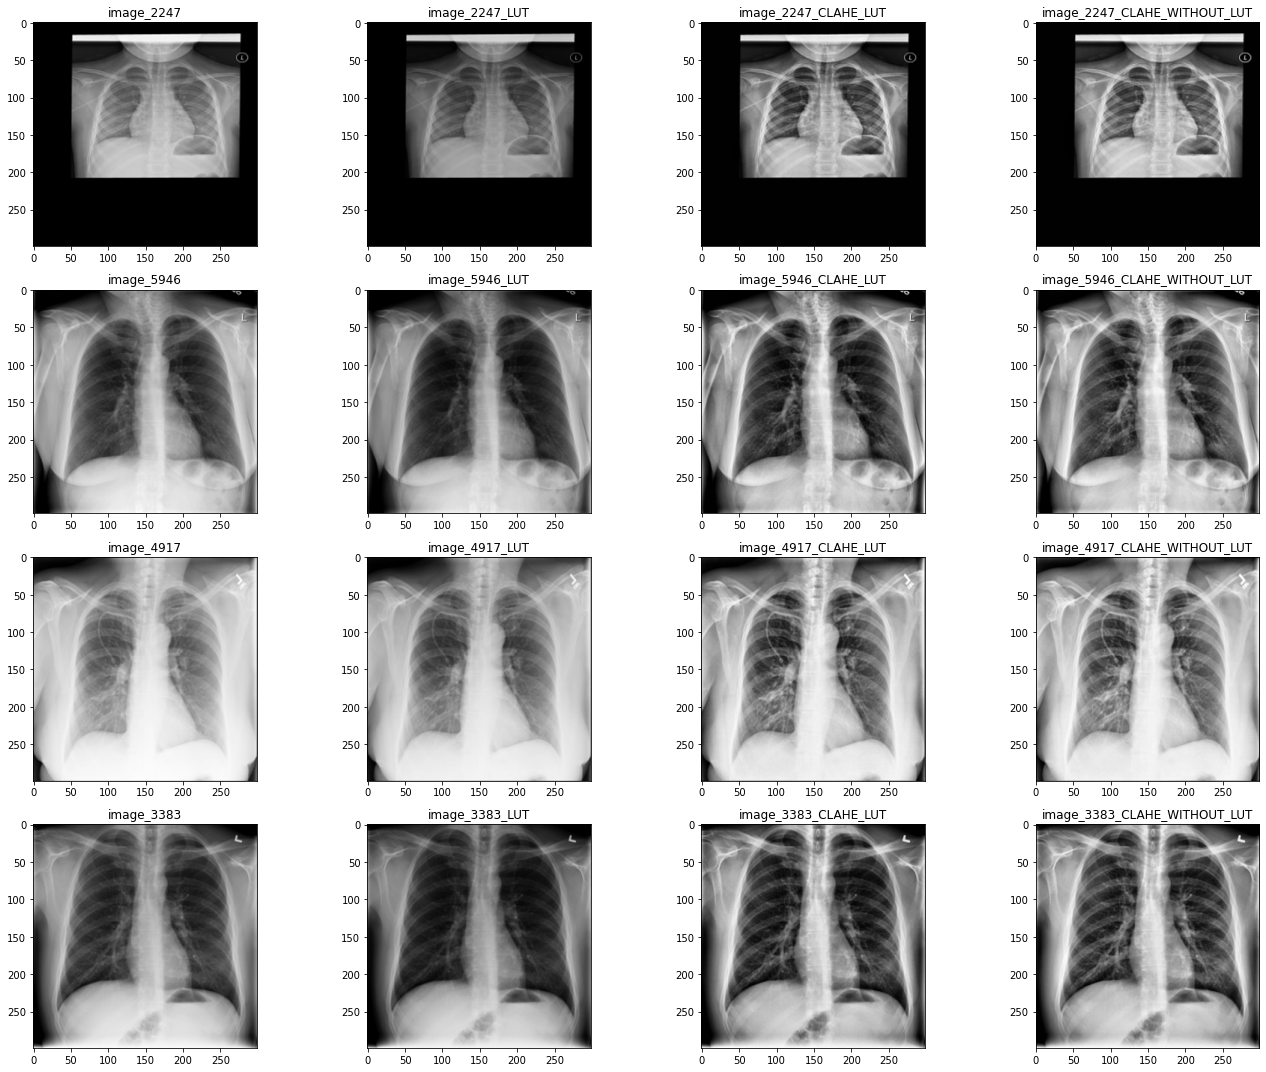

In [ ]:
np.random.seed = 42
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
gamma =1.3
lookUpTable = np.empty((1,256), np.uint8)
for j in range(256):
    lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
    
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image  = cv2.imread(img_path)
    
    
    ax = plt.subplot(4,4,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    for j in range(256):
        lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
        
    ax = plt.subplot(4,4,i)
    lut = cv2.LUT(image, lookUpTable)
    plt.title(f'image_{index}_LUT')
    plt.imshow(lut , cmap='gray')
    i+=1
    
    
    ax = plt.subplot(4,4,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(lut[:,:,0] )
    plt.title(f'image_{index}_CLAHE_LUT')
    plt.imshow(final_img , cmap='gray')
    i+=1
    
    ax = plt.subplot(4,4,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(image[:,:,0] )
    plt.title(f'image_{index}_CLAHE_WITHOUT_LUT')
    plt.imshow(final_img , cmap='gray')
    i+=1
    
    
    
    plt.tight_layout()

<a id='summary'></a>
### summary from the above two cells :
- using `CLAHE` filter improved the images , but still the result is not so good with bright images , but using it with `LUT` gave us better results
- as we can see from `edge detection` , we can use it to find the images will high bright as i will not have much edges in it
- i will first try using just `hist` to define the bright images and if the results was not good then i will use `edge detection with shallow CNN`

<a id='GausianBlur'></a>
### now let's see the effect of using `GausianBlur`

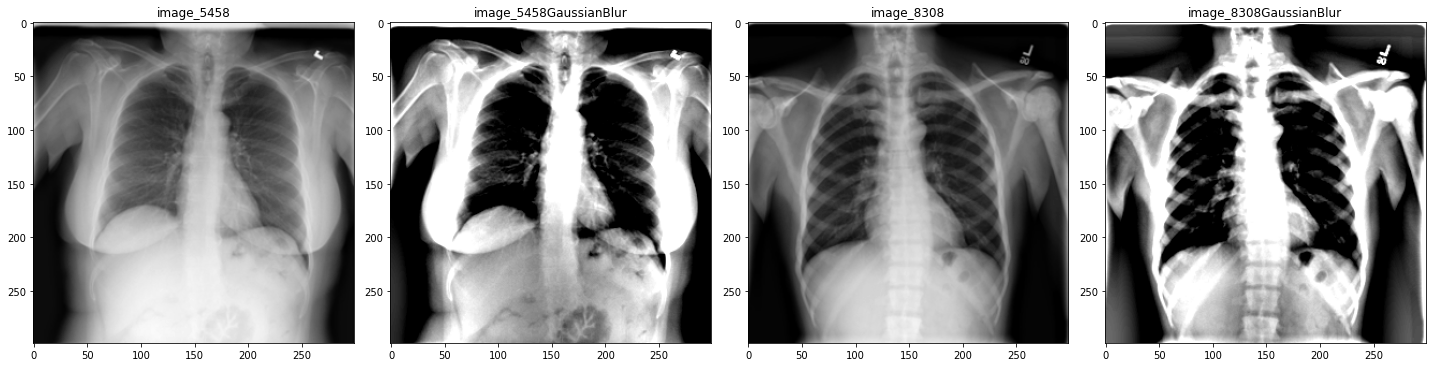

In [ ]:
sizee = 4
i = 1
rand_index = np.random.randint(low = 0 ,high = high,size = size)
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image  = cv2.imread(img_path)
    ax = plt.subplot(2,4,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    ax = plt.subplot(2,4,i)
    image = cv2.addWeighted (image, 4, cv2.GaussianBlur(image, (0,0), 256/10), -4, 128) 
    plt.title(f'image_{index}GaussianBlur')
    plt.imshow(image , cmap='gray')
    i+=1
    
    plt.tight_layout()

<a id='pre-processing_steps'></a>
# steps of pre-processing :
- 1- load the whole data
- 2- get ride of the black border `zero padding` 
- 3- get the histgram of each image and save images that has median higher then `200` and less than `50` to manually exam them
- 4- apply `LUT`
- 5- apply `CLAHE`
- 6- normalize all the images `/255.`
- 7- before feeding the images to models apply agmentation like `mirrirong` , `zooming`

<a id='loading_dataset'></a>
### loading dataset

In [35]:
directory = 'D:/Bi electric scolership/computer vision/COVID-19_Radiography_Dataset/data'
for (root,dirs,files) in os.walk(directory, topdown=True):
        print (dirs)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [ ]:
directory = 'D:/Bi electric scolership/computer vision/COVID-19_Radiography_Dataset/data'

#load data

train_data =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    label_mode="int",
    class_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    label_mode="int",
    class_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)


Found 21165 files belonging to 4 classes.
Using 16932 files for training.
Found 21165 files belonging to 4 classes.
Using 4233 files for validation.


> label_mode : 'int'=> means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
- we could use `cv2` to convert the image to gray scale but i did that directly when loading the images 

> i will load the data using  `tf.data.Dataset`
- The `tf.data API` enables us to build complex input pipelines 
    - so i will define a transformation function that has all the steps i want above and then apply these function to my data 

> now what is the structure of our data:
- our data consist of  images and the label correspond to each image `we can consider it as if our data is now two columns one for images and the second for label` 
    - futher more our data is now batched and each batch has `32` image in it so whenever we loop through our data `each element will be batch of 32 images and they labels`
    - so when we say `element[0]` we now accessing the first batch , `element[0][0]` get us the first image in first batch
    - saying `element[1]` we get the first batch of labels , and when we say `element[1][0]` we get the first label in the first batch
  

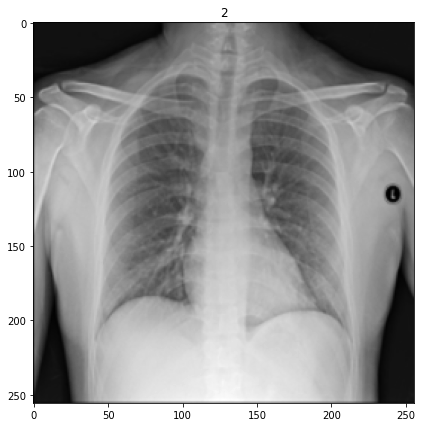

In [ ]:
plt.figure(figsize=(15,7))
for ele in train_data:
    img = ele[0][11]
    title = ele[1][11].numpy() # matplot is compatable with numpy but not with tensor so we should convert tensor to numpy 
    plt.imshow(img , cmap='gray')
    plt.title(title)
    
    break

<a id='finding_dameged_images'></a>
> first let's get all the dameged images
- remember that the images that has median of 175 the filters were able to correct it so let's use `180` to define the bright images , and `50` for dark images 

In [ ]:
def detect_dameged_images(dataset : tf.data.Dataset)-> np.array : 
    images_list = []
    images_labels = []
    for element in dataset.unbatch():
        image = element[0].numpy() # first dim represent the image and second dim represent the label
        label = element[1].numpy()
        median = np.median(image)
        if median < 50 or median > 180:
            images_list.append(image)
            images_labels.append(label)
    return images_list , images_labels
            

### train dataset :

In [ ]:
images_list = []
images_labels = []
images_list , images_labels = detect_dameged_images(train_data)

In [ ]:
len(images_labels)

1343

> side note : 
- if we want to get the number of images in dataset i can get the lenghts which will get me number of batched and i need batch size os i can get total number of images in dataset

In [ ]:
len(val_data)*32

4256

In [ ]:
images_list_val , images_labels_val = detect_dameged_images(val_data)

In [ ]:
len(images_labels_val)

342

> now let's see a smaple from the images to decided if we will drop them or use them 
- for train :
    - the images are less that i expected they just represent `0.0793` of the data so dropping them is an option
    - and since they are few of them i will chech all the `1343` images
- for val :
    - the images only represent `0.080` of val data

In [ ]:
def vis_images(images_list :np.array , size , random = True , title = None):
    '''
        plot sample of images list 
            - the sample can be random or not depend on the parameter `random`
        our plot will has 4 column and number of rows will be defined based on the size which represent number of images we want to plot
    '''
    plt.title(title)
    rows = (size//4) 
    if random == True:
        high = len(images_list)
        rand_index = np.random.randint(low = 0 ,high = high,size = size)
    for i in range(0,size):
        
        plt.subplot(rows,4,i+1)
        if random == True : 
            index = rand_index[i]
        else :
            index = i
        
        median = int(np.median(images_list[index]))
        plt.title(f'median is`{median}` and index is `{index}`')
        
        plt.imshow(images_list[index] , cmap='gray') 

<a id='plt_sample_dameged_images'></a>
> let's plot some random dameged images :  

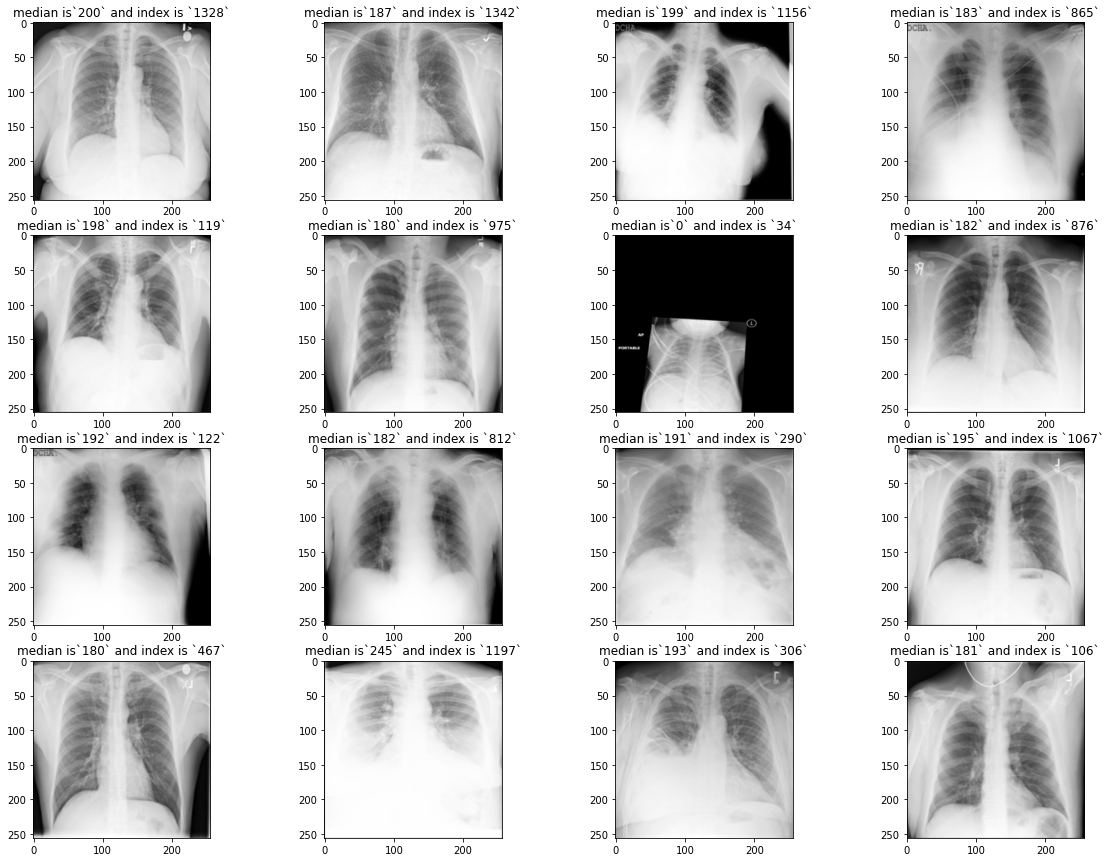

In [ ]:
vis_images(images_list , 16)

<a id='save_dameged_images'></a>
> saving dameged images into seperate folder

> #### train :

In [ ]:
dameged_path_train = 'D:/Bi electric scolership/computer vision/COVID-19_Radiography_Dataset/dameged_data_train'

In [ ]:
if (os.path.exists(dameged_path_train)) == False :
    os.makedirs(dameged_path_train)
    for i in range(len(images_list)):
        path = os.path.join(dameged_path_train,f'image_{i}.png')
        cv2.imwrite(path, images_list[i])
else :
    print("dameged data already in the path")

dameged data already in the path


> #### val : 

In [ ]:
dameged_path_val = 'D:/Bi electric scolership/computer vision/COVID-19_Radiography_Dataset/dameged_data_val'

In [ ]:
if (os.path.exists(dameged_path_val)) == False :
    os.makedirs(dameged_path_val)
    for i in range(len(images_list_val)):
        path = os.path.join(dameged_path_val,f'image_{i}.png')
        cv2.imwrite(path, images_list_val[i])
else :
    print("dameged data val already in the path")

dameged data val already in the path


<a id='explore_dameged_images'></a>
> dameged images expolaration

> #### train

In [ ]:
index  = [0 , 1 , 2 , 9 , 13 , 14 , 85 , 131 , 3 , 21 , 45 , 73 , 107  , 159 , 188 , 233] 
dameged_images = []
for i in index:
    path = os.path.join(dameged_path_train, f'image_{i}.png')
    img = cv2.imread(path)
    dameged_images.append(img)

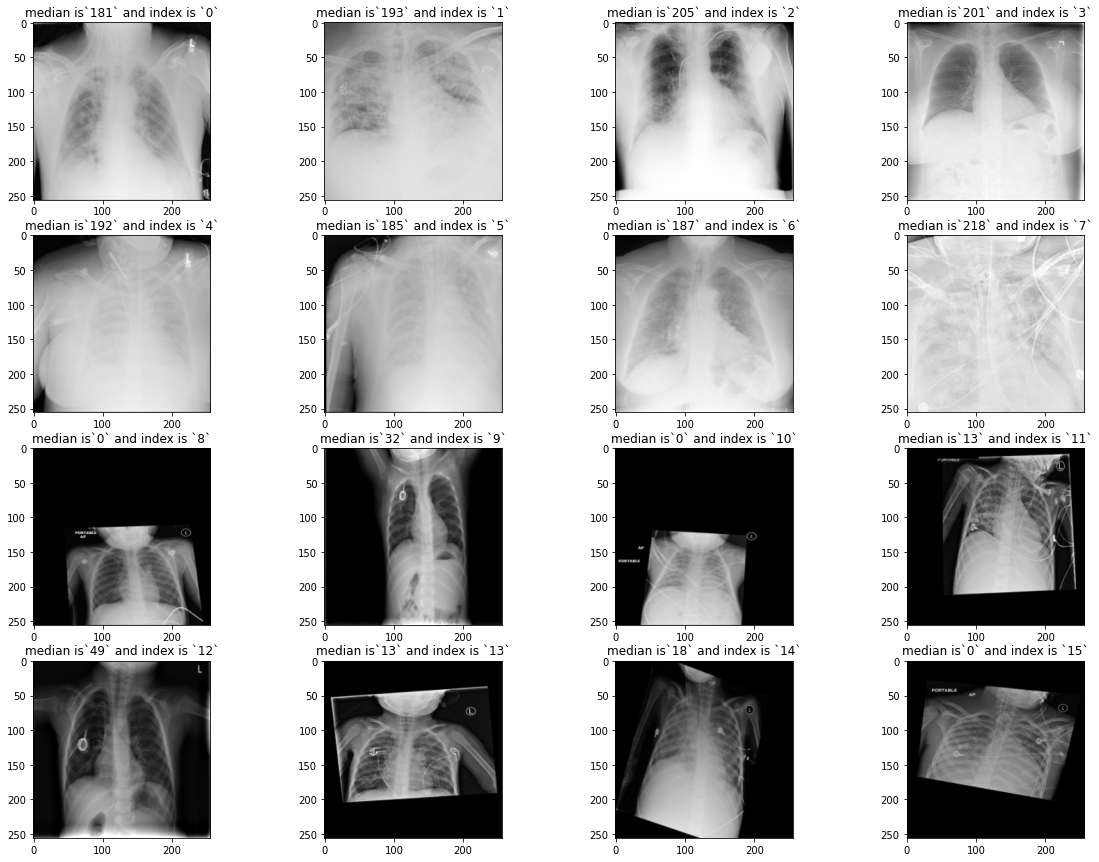

In [ ]:
vis_images(dameged_images , 16 , random=False)

> #### val

In [ ]:
index  = [12 , 13 ,47  , 95 , 6 , 26 , 53 , 150] 
dameged_images_val = []
for i in index:
    path = os.path.join(dameged_path_val, f'image_{i}.png')
    img = cv2.imread(path)
    dameged_images_val.append(img)

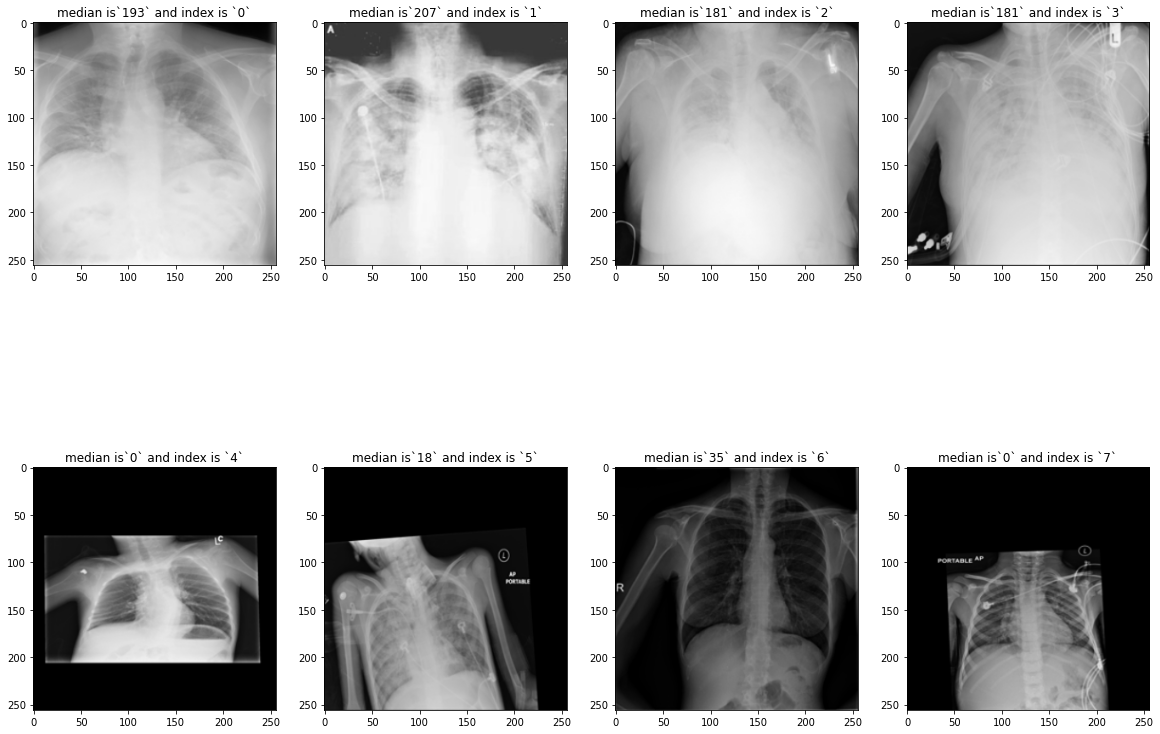

In [ ]:
vis_images(dameged_images_val , 8 , random=False)

> we have two types of dameged images 
- the bright ones : i will first add `GaussianBlur` so we can reduce the sharpen of the image and let it be more smooth
- the dark images : there are few numbers of them and we can fix using a crop function 
> the problems above is the same in val


<a id='fixing_blake_border_of_images'></a>
### fixing black frames in images : 

In [ ]:
y_nonzero, x_nonzero, _ = np.nonzero(dameged_images[8])

In [ ]:
def crop(image):
    ## image should be 3D (m,n,c) => c and be 1 "gray" or 3 "RGB"
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    ymin =y_nonzero.min()
    ymax = y_nonzero.max()
    xmin = x_nonzero.min()
    xmax = x_nonzero.max()
    return image[ymin:ymax , xmin:xmax]

In [ ]:
# let' see the images from index 8 to 15
croped_images = []
for index in range(8,16):
    img = dameged_images[index]
    croped_images.append(img)
    img = crop(img)
    croped_images.append(img)

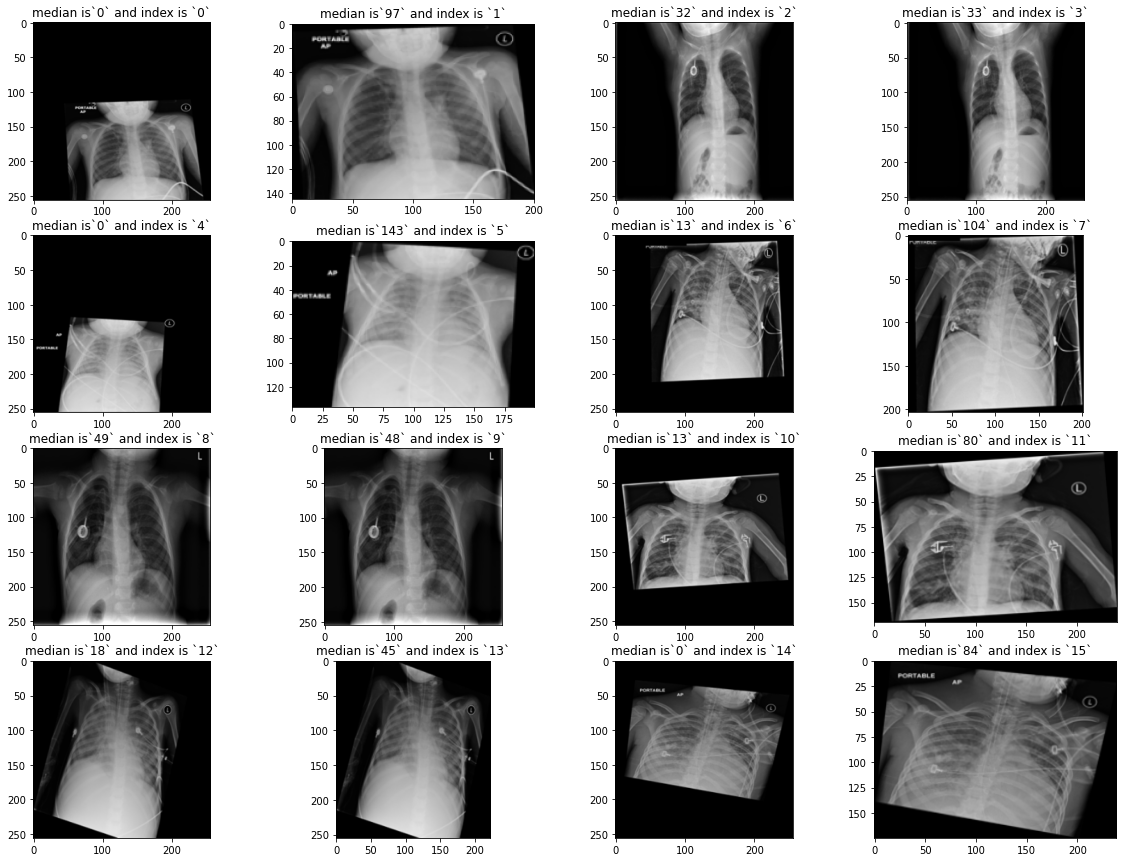

In [ ]:
vis_images(croped_images ,16, random=False )

> we can see that we were able to get ride of black frames in most of the case , but that changed the size of our image so we need to resize it
- we will clean all the images and save them in clean folder and then load them again so we can not resize the imgaes here and resize them late when we re-load the images

> let's see the effect of `GaussianBlur`

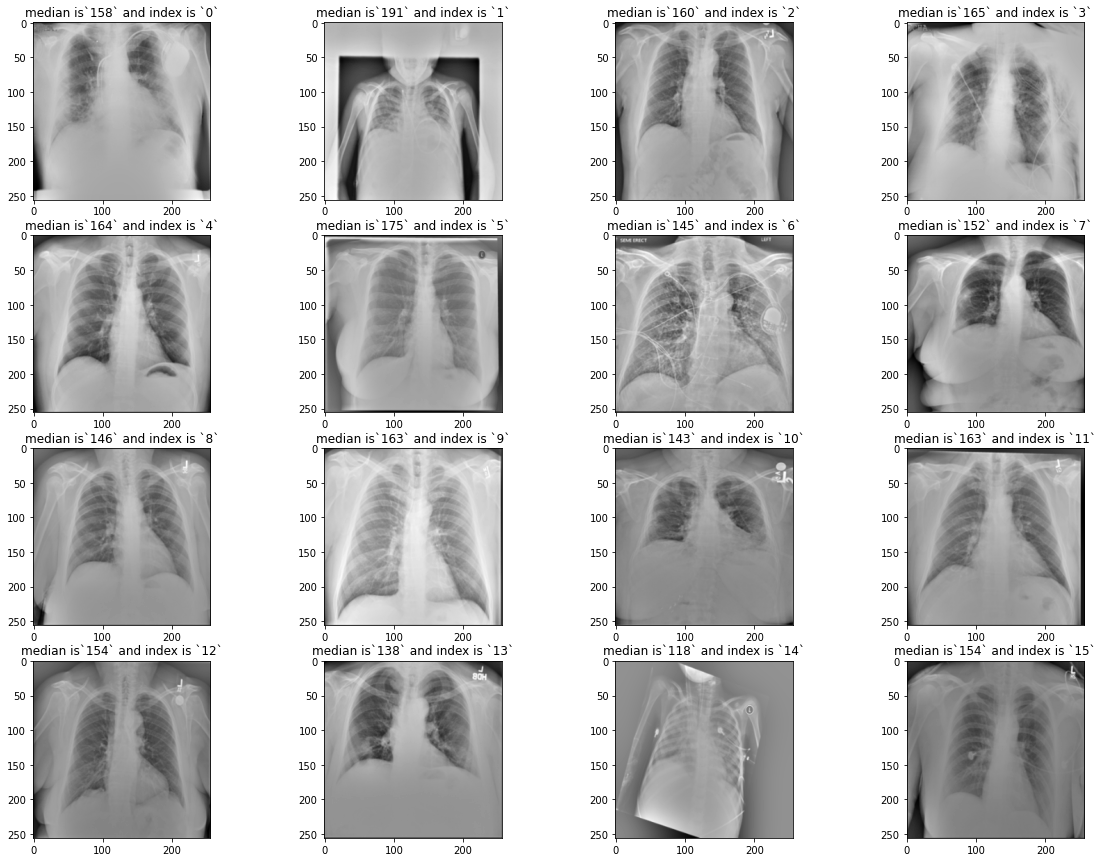

In [ ]:
index  = [0 , 1 , 2 , 9 , 13 , 14 , 85 , 131 , 3 , 21 , 45 , 73 , 107  , 159 , 188 , 233] 
gaussian_images = []
for i in index:
    img = images_list[i]
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 256/10), -4, 128) 
    gaussian_images.append(img)

vis_images(gaussian_images , 16 , random=False)    

<a id='Gaussian_on_cleaned_images'></a>
> not that much improvment but `Gaussian blur` can help so let's try it with correct image

tf.Tensor(2, shape=(), dtype=int32)
117.82463


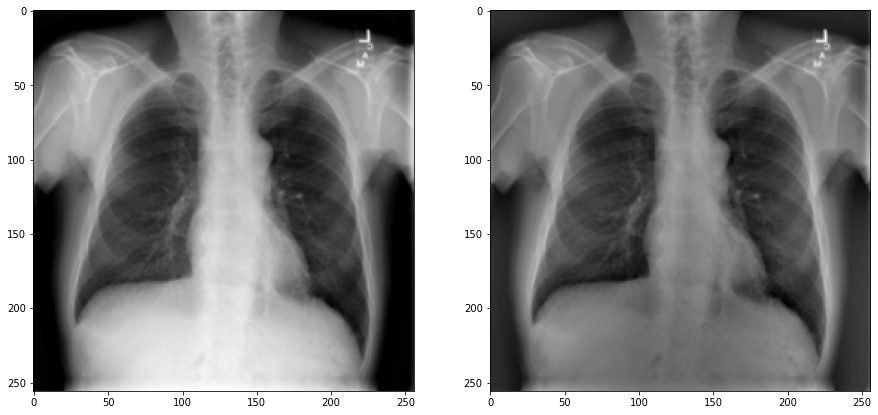

In [ ]:
plt.figure(figsize=(15,7))
for image , label in train_data.unbatch():
    print(label)
    plt.subplot(1,2,1)
    img  = image.numpy()
    m = np.median(img)
    print(m)
    plt.imshow(img , cmap='gray')
    plt.subplot(1,2,2)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 256/10), -4, 128)
    plt.imshow(img , cmap='gray')
    break

> so much better , it can be the best image i got so for 
- now i have two opptions
    - use filter as above
    - use `GaussianBlur` only
- so i will try both ways and see which one will get better results
- using `GaussianBlur` with filters will get me bad images that is why i will use these two ways seperatly

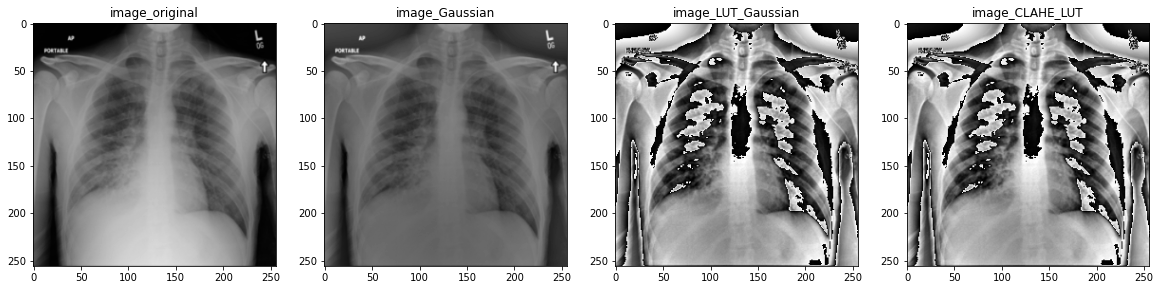

In [ ]:
gamma =1.3
lookUpTable = np.empty((1,256), np.uint8)
for j in range(256):
    lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
    
for image , label in train_data.unbatch():
    plt.subplot(1,4,1)
    img  = image.numpy()
    plt.imshow(img , cmap='gray')
    plt.title(f'image_original')
    

    plt.subplot(1,4,2)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 256/10), -4, 128)
    plt.imshow(img , cmap='gray')
    plt.title(f'image_Gaussian')
    
    #img_ = np.dstack([img, img, img]) ## to change image form 1D to 3D but i will not use it
    img = img.astype(np.uint8) # lut will throw an error if the datatype was not uint8 so i should convert the type

    plt.subplot(1,4,3)
    lut = cv2.LUT(img, lookUpTable)
    plt.title('image_LUT_Gaussian')
    plt.imshow(lut , cmap='gray')
    
    plt.subplot(1,4,4)
    clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(1,1))
    final_img = clahe.apply(lut)
    plt.title(f'image_CLAHE_LUT')
    plt.imshow(final_img , cmap='gray')
    
    break        

> using `GaussionBlur` with filters get me bad images

> now that we know how we will pre-proccess the data let's do that so we can move to models step

# steps of pre-processing :
- 1- load the whole data
- 2- get ride of the black border `zero padding` 
- 3- get the histgram of each image and save images that has median higher then `200` and less than `50` to manually exam them
- 4- apply `LUT`
- 5- apply `CLAHE`
- 6- normalize all the images `/255.`
- 7- before feeding the images to models apply agmentation like `mirrirong` , `zooming`

In [ ]:
def dataset_to_numpy_util(dataset):
    '''
     this function is to convert my dataset to numpy array because i will need this for  visualization 
    '''
    
    ds_images, ds_labels = [], []
    for images, labels in dataset.unbatch():
        ds_images.append(images.numpy())
        ds_labels.append(labels.numpy())
    
    return (np.array(ds_images), np.array(ds_labels))

<a id='pre-processing_function'></a>
> pre-processing_function

In [ ]:
def preprocessing(dataset :tf.data.Dataset) ->list:
    images = []
    labels = []
    gamma =1.3
    lookUpTable = np.empty((1,256), np.uint8) 
    
    for image , label in dataset.unbatch() :
        image = tf.cast(image , tf.uint8)
        image = image.numpy()
        
        ##  step 1 - get rid of black frame ##
        image = image.reshape(image.shape[0], image.shape[1] , 1)
        image = crop(image)
        median = np.median(image)
        
        ##  step 2 - filter images based on their median ##
        if median < 50 or median > 180:
            pass
        else :
            for j in range(256):
                lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
        
        #  step 3 - apply LUT ##    
            lut = cv2.LUT(image, lookUpTable)

        #  step 4 - apply CLAHE ##
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
            final_img = clahe.apply(lut)
            
            
            images.append(final_img)
            labels.append(label) 
            
    return images , labels

<a id='apply_pre-processing_function_on_all_data'></a>
### clean train dataset

In [ ]:
train_images , train_labels = preprocessing(train_data)

In [ ]:
val_images , val_labels = preprocessing(val_data)

In [ ]:
print(len(train_images))
print(len(train_labels))

15734
15734


In [ ]:
print(len(val_images))
print(len(val_labels))

3919
3919


<a id='save_cleaned_data'></a>
### saving the cleaned data into folder like the original so we can load them again

In [ ]:
folders = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
train_clean_dir = 'D:\Bi electric scolership\computer vision\COVID-19_Radiography_Dataset\cleaned_data_train'
val_clean_dir = 'D:\Bi electric scolership\computer vision\COVID-19_Radiography_Dataset\cleaned_data_val'

In [ ]:
def save_data(images , labels , cleaned_path ):
    for folder in folders:
        path = os.path.join(cleaned_path,folder)
        if os.path.isdir(path):
            pass
        else :
            os.makedirs(path)
    
    c_count = 0
    l_count = 0
    n_count = 0
    v_count = 0
    
    if len(os.listdir(os.path.join(cleaned_path , folders[0])))==0: # is empty
        for img , label in zip(images,labels):
            label = label.numpy()
            # img *= 255 # [0, 255] range
            if label ==0:
                c_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{c_count}.png')
                cv2.imwrite(file_name , img)
            
            elif label ==1:
                l_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{l_count}.png')
                cv2.imwrite(file_name , img)
                
            elif label ==2:
                n_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{n_count}.png')
                cv2.imwrite(file_name , img)
                
            elif label ==3:
                v_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{v_count}.png')
                cv2.imwrite(file_name , img)

In [ ]:
save_data(train_images , train_labels , train_clean_dir)

In [ ]:
save_data(val_images , val_labels , val_clean_dir)

> there are two important points we need to remember 
- some images has different shape becasue they were cropped but we can deel with that when loading the data
- we need to normalize as we did not do that in preprocessing step

<a id='load_cleaned_data'></a>
> load cleaned data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
## if we used local device
# train_directory = 'D:\Bi electric scolership\computer vision\COVID-19_Radiography_Dataset\cleaned_data_train'
# val_directory = 'D:\Bi electric scolership\computer vision\COVID-19_Radiography_Dataset\cleaned_data_val'

train_directory = '/content/drive/MyDrive/Colab Notebooks/cleaned_data_train'
val_directory = '/content/drive/MyDrive/Colab Notebooks/cleaned_data_val'

train_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_directory,
    labels="inferred",
    label_mode="int",
    class_names = None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256), # remeber that some images were croped
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    follow_links=False,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = val_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    follow_links=False,
)

Found 15734 files belonging to 4 classes.
Found 3927 files belonging to 4 classes.


In [ ]:
print(type(train_dataset))
print(type(val_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [7]:
def normalize(image , label):
    image = image / 255.
    return image , label 
    

In [8]:
train_dataset = train_dataset.map(normalize, num_parallel_calls=16)
train_dataset = train_dataset.shuffle(buffer_size = 512, reshuffle_each_iteration=True) 
train_dataset = train_dataset.repeat() 
train_dataset = train_dataset.prefetch(-1) # AUTOTUNE	-1 so here we use AUTOTUNE

In [9]:
val_dataset = val_dataset.map(normalize, num_parallel_calls=16)
val_dataset = val_dataset.repeat()

<a id='modeling'></a>
### Modeling :
- i will use models that i impelemented `i will use transfer learning but with models that i built`

<a id='VGG'></a>
> ### VGG19

In [ ]:
def Block(inputs ,filters ,stage, kernel_size=3, pool_size=2 , strides=2,repetitions = 2):
    """
    # vgg consist of some repeated blocks each block can has two or three Conv2D layer followed by a MaxPool2D layer
    
    # Arguments
        inputs : can be an input from a previous layer or tf.keras.layers.Input
        filters : the number of filter to use in conv layers 
        kernel_size : default  3
        pool_size : default  2 
        strides : default  2
        repetitions : each block in vgg can consist of two ot three repetitions of Conv2D layer
        stage : a variabel to name our layers

    # Returns
        Output tensor for the block.
    
    """
    x = inputs

    for i in range(repetitions):
        
        x = Conv2D( filters = filters 
                                   ,kernel_size = kernel_size
                                   ,activation='relu'  
                                   ,padding='same'
                                   ,name = f'conv{stage}_{i}')(x)

    x = MaxPool2D(pool_size = pool_size
                   ,strides = strides
                   , name = f'maxpool{stage}')(x)
    return x

In [ ]:
def VGG19(include_top = True ,weights='imagenet',
          input_tensor=None, input_shape=None,
          pooling=None,
          num_classes=1000):
    """
    # Arguments
    include_top: whether to include the fully-connected
        layer at the top of the network.
    weights: one of `None` (random initialization)
        or "imagenet" (pre-training on ImageNet).
    input_tensor: to use as image input for the model.
    input_shape: shape of the input
    pooling: Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` means that the output of the model will be
            the 4D tensor output of the last convolutional layer.
    classes:  number of classes to classify images
        into

    """

    WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
    WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'


    if weights not in {'imagenet' , None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')
    
    if input_tensor == None and input_shape == None :
        raise ValueError('should enter atleast the shape of the input')
    
    if weights == 'imagenet' and include_top and num_classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        img_input = Input(tensor=input_tensor)
            

    
    # Creating blocks of VGG with the following 
    # (filters, kernel_size, repetitions) configurations
    block_a = Block(inputs = img_input ,filters = 64,  kernel_size = 3, repetitions = 2 ,stage = 1)
    block_b = Block(inputs = block_a ,filters = 128, kernel_size = 3, repetitions = 2 ,stage = 2)
    block_c = Block(inputs = block_b ,filters = 256, kernel_size = 3, repetitions = 4 ,stage = 3)
    block_d = Block(inputs = block_c ,filters = 512, kernel_size = 3, repetitions = 4 ,stage = 4)
    block_e = Block(inputs = block_d ,filters = 512, kernel_size = 3, repetitions = 4 ,stage = 5)
    
    x = block_e
    # Classification head
    if include_top:
        # Classification block
        x = Flatten(name='flatten')(x)
        x = Dense(4096, activation='relu', name='fc1')(x)
        x = Dense(4096, activation='relu', name='fc2')(x)
        x = Dense(num_classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(block_e)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(block_e)
    
    model = Model(img_input, x, name='vgg19')
    
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('vgg19_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
        model.load_weights(weights_path)
    return model

In [ ]:
model = VGG19(include_top = False , 
          input_shape=(256,256,3),
          pooling='max',
          num_classes=4)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1_0 (Conv2D)            (None, 256, 256, 64)      1792      
                                                                 
 conv1_1 (Conv2D)            (None, 256, 256, 64)      36928     
                                                                 
 maxpool1 (MaxPooling2D)     (None, 128, 128, 64)      0         
                                                                 
 conv2_0 (Conv2D)            (None, 128, 128, 128)     73856     
                                                                 
 conv2_1 (Conv2D)            (None, 128, 128, 128)     147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 64, 64, 128)       0     

> let's see the layers and get the name of last layer

In [ ]:
model.layers[-1].name

'global_max_pooling2d'

In [ ]:
last_layer = model.get_layer(model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 512)
KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name=None), name='global_max_pooling2d/Max:0', description="created by layer 'global_max_pooling2d'")


### Add layers
we will add :
- `Flatten` layer 
- `Dense` layer with 256 units with `relu` activation function
- `Dense` layer with 128 units with `relu` activation function
- `Dense` layer with 64 units with `relu` activation function
- `Dense` layer with 32 units with `relu` activation function
- `Dense` layer with 16 units with `relu` activation function
- `Dense` layer with 4 units with `softmax` activation function for classification 


In [ ]:
x = Flatten()(last_output) 

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

final_model = Model(model.input, x)

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1_0 (Conv2D)            (None, 256, 256, 64)      1792      
                                                                 
 conv1_1 (Conv2D)            (None, 256, 256, 64)      36928     
                                                                 
 maxpool1 (MaxPooling2D)     (None, 128, 128, 64)      0         
                                                                 
 conv2_0 (Conv2D)            (None, 128, 128, 128)     73856     
                                                                 
 conv2_1 (Conv2D)            (None, 128, 128, 128)     147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 64, 64, 128)       0     

In [ ]:
opt = tf.keras.optimizers.SGD(momentum=0.2)  
final_model.compile(optimizer=opt,
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [ ]:
checkpoint_path_vgg = 'training_1/vgg.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_vgg)
EPOCHS = 50
BATCH_SIZE = 32
                                          
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_vgg,                         
                                                save_weights_only=True,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only=True,
                                                verbose=1)

history = final_model.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS,
                             callbacks = [cp_callback])


Epoch 1/50
492/492 [==============================] - 148s 299ms/step - loss: 0.6619 - acc: 0.7451 - val_loss: 0.6086 - val_acc: 0.7571
Epoch 2/50
492/492 [==============================] - 153s 309ms/step - loss: 0.5693 - acc: 0.7809 - val_loss: 0.5959 - val_acc: 0.7667
Epoch 3/50
492/492 [==============================] - 152s 308ms/step - loss: 0.5375 - acc: 0.7929 - val_loss: 0.4690 - val_acc: 0.8169
Epoch 4/50
492/492 [==============================] - 163s 331ms/step - loss: 0.5048 - acc: 0.8088 - val_loss: 0.5587 - val_acc: 0.7782
Epoch 5/50
492/492 [==============================] - 152s 309ms/step - loss: 0.4828 - acc: 0.8164 - val_loss: 0.4549 - val_acc: 0.8225
Epoch 6/50
492/492 [==============================] - 152s 309ms/step - loss: 0.4681 - acc: 0.8191 - val_loss: 0.4463 - val_acc: 0.8256
Epoch 7/50
492/492 [==============================] - 152s 309ms/step - loss: 0.4579 - acc: 0.8242 - val_loss: 0.4610 - val_acc: 0.8266
Epoch 8/50
492/492 [============================

In [ ]:
vgg_acc=history.history['acc']
vgg_val_acc=history.history['val_acc']
vgg_loss=history.history['loss']
vgg_val_loss=history.history['val_loss']

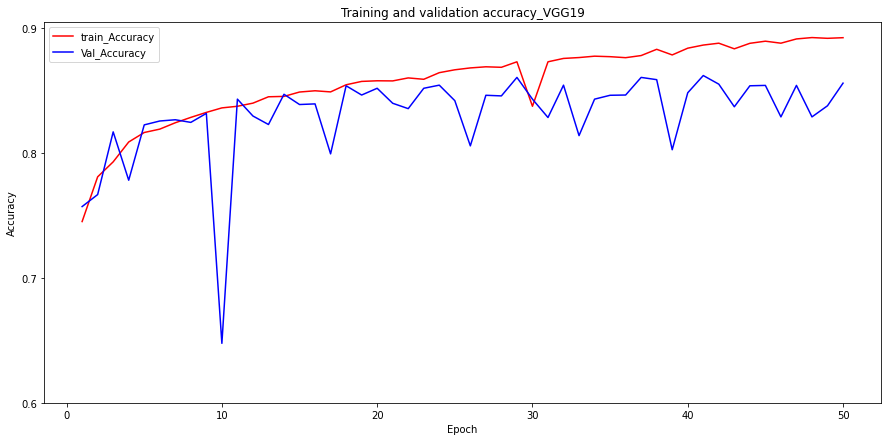

In [ ]:
plt.figure(figsize=(15,7))
plt.plot( vgg_acc, 'r' ,  label = 'train_Accuracy')
plt.plot( vgg_val_acc, 'b' , label = 'Val_Accuracy')
plt.title('Training and validation accuracy_VGG19')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

<a id='ResNet50'></a>
>### RESNET50

In [ ]:
def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.

    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names

    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization( name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization( name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization( name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x

In [ ]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """conv_block is the block that has a conv layer at shortcut

    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names

    # Returns
        Output tensor for the block.

    Note that from stage 3, the first conv layer at main path is with strides=(2,2)
    And the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization( name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization (name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization( name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


In [ ]:
def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
    """
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: to use as image input for the model.
        input_shape: shape of the input
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the last convolutional layer.
        classes:  number of classes to classify images
            into

    """
    
    WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
    WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


    if input_shape == None and input_tensor == None:
        raise ValueError('should enter atleast the shape of the input')
        
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
            img_input = Input(tensor=input_tensor)
            

    x = ZeroPadding2D((3, 3))(img_input)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization( name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = AveragePooling2D((7, 7), name='avg_pool')(x)

    if include_top:
        x = Flatten()(x)
        x = Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)


   
    # Create model.
    model = Model(img_input, x, name='resnet50')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
        else:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    md5_hash='a268eb855778b3df3c7506639542a6af')
    model.load_weights(weights_path)

    return model


In [ ]:
res_model = ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3,))

In [ ]:
for layer in res_model.layers:
    layer.trainable = False

In [ ]:
last_layer = res_model.get_layer(res_model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 1, 1, 2048)
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 2048), dtype=tf.float32, name=None), name='avg_pool/AvgPool:0', description="created by layer 'avg_pool'")


> add layers : 

In [ ]:
x = Flatten()(last_output) 

x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

res_model = Model(res_model.input, x)

In [ ]:
res_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 262, 262, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d_2[0][0]']       
                                )                                                             

In [ ]:
opt = tf.keras.optimizers.SGD(momentum=0.3)  
res_model.compile(optimizer=opt,
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [20]:
checkpoint_path_resnet = 'training_1/res.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_resnet)
EPOCHS = 30
BATCH_SIZE = 32
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_resnet,                         
                                                save_weights_only=True,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only=True,
                                                verbose=1)

history = res_model.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS,
                             callbacks = [cp_callback])

Epoch 1/30
492/492 [==============================] - 79s 117ms/step - loss: 1.1551 - accuracy: 0.6281 - val_loss: 0.6045 - val_accuracy: 0.7539
Epoch 2/30
492/492 [==============================] - 68s 114ms/step - loss: 0.6858 - accuracy: 0.7351 - val_loss: 0.5216 - val_accuracy: 0.7931
Epoch 3/30
492/492 [==============================] - 68s 114ms/step - loss: 0.5558 - accuracy: 0.7930 - val_loss: 0.5606 - val_accuracy: 0.7714
Epoch 4/30
492/492 [==============================] - 68s 115ms/step - loss: 0.4691 - accuracy: 0.8229 - val_loss: 0.4276 - val_accuracy: 0.8370
Epoch 5/30
492/492 [==============================] - 68s 114ms/step - loss: 0.4131 - accuracy: 0.8481 - val_loss: 0.3932 - val_accuracy: 0.8465
Epoch 6/30
492/492 [==============================] - 68s 114ms/step - loss: 0.3773 - accuracy: 0.8634 - val_loss: 0.3711 - val_accuracy: 0.8540
Epoch 7/30
492/492 [==============================] - 68s 114ms/step - loss: 0.3449 - accuracy: 0.8743 - val_loss: 0.4660 - val_ac

In [ ]:
res_acc=history.history['acc']
res_val_acc=history.history['val_acc']
res_loss=history.history['loss']
res_val_loss=history.history['val_loss']

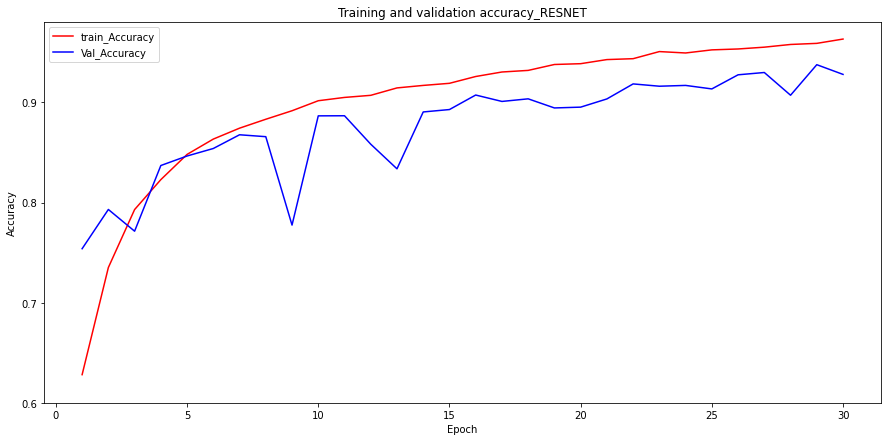

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(res_acc, 'r' ,  label = 'train_Accuracy')
plt.plot(res_val_acc, 'b' , label = 'Val_Accuracy')
plt.title('Training and validation accuracy_RESNET')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

<a id='Inception_V3'></a>
> ### inception

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inception_model = InceptionV3(include_top=False , input_shape=(256,256,3) , pooling='max',
                classes=4 )

87924736/87910968 [==============================] - 158s 2us/step


In [ ]:
for layer in inception_model.layers:
    layer.trainable = False

In [ ]:
last_layer = inception_model.get_layer(inception_model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 2048)
KerasTensor(type_spec=TensorSpec(shape=(None, 2048), dtype=tf.float32, name=None), name='global_max_pooling2d/Max:0', description="created by layer 'global_max_pooling2d'")


In [ ]:
x = Flatten()(last_output) 

x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

inception_model = Model(inception_model.input, x)

In [ ]:
inception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
opt = tf.keras.optimizers.SGD(momentum=0.3)  
inception_model.compile(optimizer=opt,
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

> becuase `resnet` chould get better if there are more `EPOHC` i will use `50` with inception but i will use `eary stopping` 

In [19]:
stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
EPOCHS = 50
BATCH_SIZE = 32
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE


history = inception_model.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS,
                             callbacks = [stopping])

Epoch 1/50
492/492 [==============================] - 291s 591ms/step - loss: 0.5983 - accuracy: 0.7305 - val_loss: 0.5330 - val_accuracy: 0.7638
Epoch 2/50
492/492 [==============================] - 284s 577ms/step - loss: 0.5099 - accuracy: 0.7330 - val_loss: 0.4462 - val_accuracy: 0.7638
Epoch 3/50
492/492 [==============================] - 284s 577ms/step - loss: 0.4548 - accuracy: 0.7336 - val_loss: 0.3705 - val_accuracy: 0.8045
Epoch 4/50
492/492 [==============================] - 284s 577ms/step - loss: 0.4100 - accuracy: 0.8087 - val_loss: 0.3403 - val_accuracy: 0.8398
Epoch 5/50
492/492 [==============================] - 284s 577ms/step - loss: 0.3683 - accuracy: 0.8456 - val_loss: 0.3147 - val_accuracy: 0.8706
Epoch 6/50
492/492 [==============================] - 284s 577ms/step - loss: 0.3441 - accuracy: 0.8642 - val_loss: 0.2937 - val_accuracy: 0.8923
Epoch 7/50
492/492 [==============================] - 284s 577ms/step - loss: 0.3256 - accuracy: 0.8743 - val_loss: 0.2735 -

In [ ]:
inception_acc=history.history['acc']
inception_val_acc=history.history['val_acc']
inception_loss=history.history['loss']
inception_val_loss=history.history['val_loss']

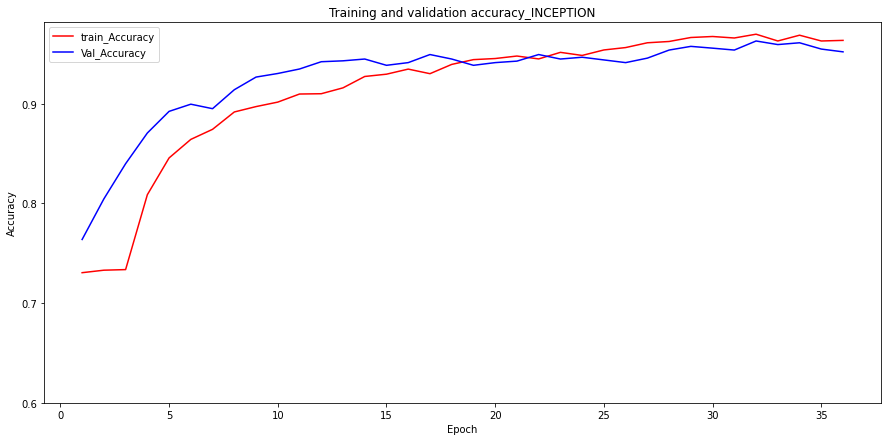

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(inception_acc, 'r' ,  label = 'train_Accuracy')
plt.plot(inception_val_acc, 'b' , label = 'Val_Accuracy')
plt.title('Training and validation accuracy_INCEPTION')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

<a id='VIT'></a>
> ### VIT

> trying to impelemnt `VIT` 

In [ ]:
# pip install -U tensorflow-addons

In [10]:
import tensorflow_addons as tfa

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
classes = 4
batch_size = 32
num_epochs = 50
image_size = 256  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier


In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 256 X 256
Patch size: 6 X 6
Patches per image: 1764
Elements per patch: 108


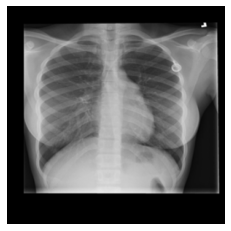

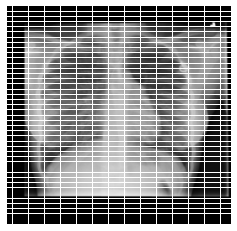

In [ ]:
plt.figure(figsize=(4, 4))
image = img1
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(256, 256)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier(input_tensor=None, 
                          input_shape=None,
                            classes=1000):
    
    
    if input_shape == None and input_tensor == None:
        raise ValueError('should enter atleast the shape of the input')
        
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
            img_input = Input(tensor=input_tensor)
            
        
    # Create patches.
    patches = Patches(patch_size)(img_input)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(classes)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=img_input, outputs=logits)
    return model

In [ ]:
vit_classifier = create_vit_classifier(input_shape=(256,256,3) , classes=4)

In [ ]:
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 patches_4 (Patches)            (None, None, 108)    0           ['input_1[0][0]']                
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 1764, 64)     119872      ['patches_4[0][0]']              
                                                                                                  
 layer_normalization (LayerNorm  (None, 1764, 64)    128         ['patch_encoder[0][0]']      

> training `234,100,932` , will take alot of time and the results will not be that good because the original model was trained on larger dataset
- so let's use a pretrained model in keras

In [ ]:
# pip install vit-keras

In [11]:
from vit_keras import vit, utils

In [12]:
image_size = (256 , 256)
classes = 4
model = vit.vit_b16(
    image_size=image_size,
    activation='relu',
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

/usr/local/lib/python3.7/dist-packages/vit_keras/utils.py:83: UserWarning: Resizing position embeddings from 24, 24 to 16, 16
  UserWarning,


In [13]:
for layer in model.layers:
  layer.trainable = False

In [16]:
model.summary()

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [14]:
last_layer = model.get_layer(model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 768)
KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='ExtractToken/strided_slice:0', description="created by layer 'ExtractToken'")


In [15]:
x = Flatten()(last_output) 

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

vit_model = Model(model.input, x)

In [21]:
vit_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 16, 16, 768)       590592    
                                                                 
 reshape (Reshape)           (None, 256, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 257, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 257, 768)         197376    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 257, 768),       7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [16]:
opt = tf.keras.optimizers.SGD(momentum=0.3)  
vit_model.compile(optimizer=opt,
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [18]:
EPOCHS = 30
BATCH_SIZE = 32
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE


history = vit_model.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS
                    )

Epoch 1/30
492/492 [==============================] - 2545s 5s/step - loss: 0.7373 - acc: 0.7053 - val_loss: 0.7042 - val_acc: 0.7237
Epoch 2/30
492/492 [==============================] - 381s 774ms/step - loss: 0.5624 - acc: 0.7848 - val_loss: 0.5256 - val_acc: 0.7948
Epoch 3/30
492/492 [==============================] - 381s 774ms/step - loss: 0.4970 - acc: 0.8110 - val_loss: 0.5600 - val_acc: 0.7904
Epoch 4/30
492/492 [==============================] - 381s 774ms/step - loss: 0.4647 - acc: 0.8240 - val_loss: 0.5094 - val_acc: 0.8098
Epoch 5/30
492/492 [==============================] - 381s 774ms/step - loss: 0.4459 - acc: 0.8332 - val_loss: 0.3908 - val_acc: 0.8500
Epoch 6/30
492/492 [==============================] - 381s 773ms/step - loss: 0.4310 - acc: 0.8343 - val_loss: 0.4196 - val_acc: 0.8370
Epoch 7/30
492/492 [==============================] - 381s 773ms/step - loss: 0.4177 - acc: 0.8459 - val_loss: 0.4061 - val_acc: 0.8498
Epoch 8/30
492/492 [==============================

In [ ]:
vit_acc=history.history['acc']
vit_val_acc=history.history['val_acc']
vit_loss=history.history['loss']
vit_val_loss=history.history['val_loss']

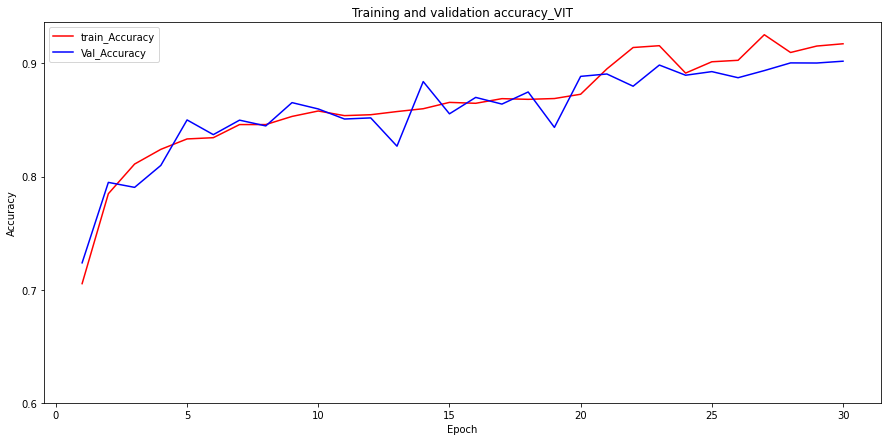

In [27]:
plt.figure(figsize=(15,7))
plt.plot(vit_acc, 'r' ,  label = 'train_Accuracy')
plt.plot(vit_val_acc, 'b' , label = 'Val_Accuracy')
plt.title('Training and validation accuracy_VIT')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

> we get best model from `Inception_v3` but `VIT` can also get better results if we trained it more